In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def read_data(D):
    X = []
    y = []
    for elem in D:
        X.append(list(elem[0]))
        y.append(elem[1])
    return np.array(X), np.array(y)

In [3]:
from sklearn.svm import SVC

## Frage 1

In [4]:
D={((2,7),-1),((7.5,0.5),-1),((3,3.3),-1),((2.5,7.5),1),((4,3.8),1),((5,2),1)}

X, y = read_data(D)
model = SVC(kernel="linear", C=1.0) # für hard margin: C=10**10 setzen
ret = model.fit(X, y)
print("Theta=" + str(np.round(ret.coef_, 3)))
print("b=" + str(np.round(ret.intercept_, 3)))

Theta=[[0.32  0.514]]
b=[-3.656]


## Frage 2

In [8]:
D_train={((8.7,16.5),1),((10.8,14.8),1),((12,16.7),1),((12.2,12.2),1),((16.5,13),-1),((5.8,23.5),-1)}
D_test={((13,12.5),1),((6.2,21.3),-1),((6,25.8),1),((8.5,27.7),-1)}
X_train, y_train = read_data(D_train)
X_test, y_test = read_data(D_test)

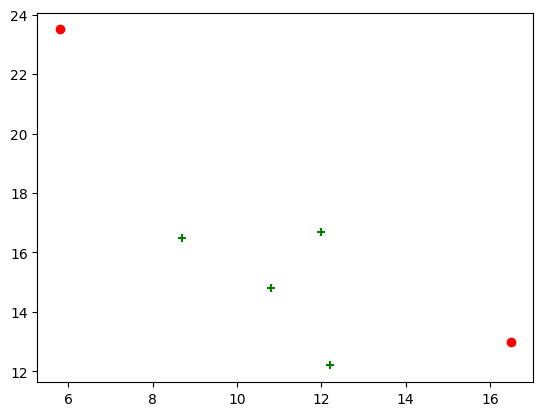

In [26]:
X_train_pos = np.array([x for i, x in enumerate(X_train) if y_train[i] == 1])
X_train_neg = np.array([x for i, x in enumerate(X_train) if y_train[i] == -1])
plt.scatter(X_train_pos[:, 0], X_train_pos[:, 1], marker="+", c="green")
plt.scatter(X_train_neg[:, 0], X_train_neg[:, 1], c="red")

In [28]:
model = SVC(kernel="rbf", C=1.0)
model.fit(X_train, y_train)
model.support_vectors_

array([[ 5.8, 23.5],
       [16.5, 13. ],
       [12.2, 12.2],
       [12. , 16.7],
       [ 8.7, 16.5]])

In [33]:
from sklearn import metrics
y_pred = model.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("recall", metrics.recall_score(y_test, y_pred))
print("f1", metrics.f1_score(y_test, y_pred))

accuracy 0.75
precision 1.0
recall 0.5
f1 0.6666666666666666
